In [26]:
from model.model import *
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
import pandas as pd


In [27]:
OPS_data = pd.read_csv('Data/OPS_data.csv',dtype={'EV_num':'int'})
load_curve = pd.read_csv('Data/load_curve.csv').set_index('time') * 0.001
EV_load_base = pd.read_csv('Data/EV_load_base.csv').set_index('time')

In [28]:
num_tests = 20
len_model = 100
pop_growth = [0.0005,0.0005]
ev_growth = [0.005,0.005]
res_dict = {}
final_curves = []
mdf_all = []

for i in range(num_tests):
    # print(f'Starting Run {i}')
    model = EV_model(OPS_data,load_curve,EV_load_base, pop_growth, ev_growth)
    model.run_model(len_model)   
    mdf = model.datacollector.get_model_vars_dataframe()
    mdf['run'] = i
    adf = model.datacollector.get_agent_vars_dataframe()
    adf['run'] = i

    all_curve = model.total_load_curve.set_index(['Date','time'])
    all_curve['Total'] = all_curve.sum(axis=1)
    res_dict[i] = all_curve
    total_len = all_curve.loc[len_model-1,'Total'].to_frame()
    total_len['i'] = i
    final_curves.append(total_len)
    mdf_all.append(mdf)

<AxesSubplot:>

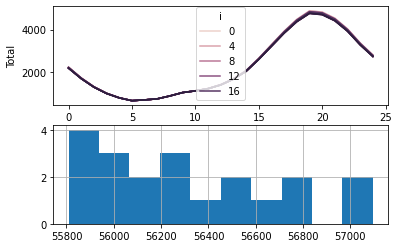

In [29]:
results = pd.concat(final_curves).reset_index()
import seaborn as sns

fig,ax = plt.subplots(2)
sns.lineplot(data=results,x='time',y='Total',hue='i',ax=ax[0])
results.set_index(['i','time']).unstack().sum(axis=1).hist(ax=ax[1])